In [124]:
%load_ext vimception

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import pylab
pylab.rcParams['figure.figsize'] = [10.0, 8.0]
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x7f5a656aa110>)

In [2]:
import astroid, sys, os, logging
import numpy as np
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
import code_reader; code_reader = reload(code_reader)
import heimdall; heimdall = reload(heimdall)
import data_flow; data_flow = reload(data_flow)
import watcher; watcher = reload(watcher)
import optimizer.optimizer as opt; opt = reload(opt)
import optimizer.loops as loops; loops = reload(loops)
import modcode; modcode = reload(modcode)
import cythonify; cythonify = reload(cythonify)
from tests import code7; code7 = reload(code7)
from tests import subscripts_1; subscripts_1 = reload(subscripts_1)
astroid.MANAGER.clear_cache()

In [4]:
heim = heimdall.Heimdall(max_nesting=2, prof_shot_time=4)
%pdb off
heim.run('code7.g(7)', globals(), locals())

Automatic pdb calling has been turned OFF
g iter 0 Took 2.561668 seconds, sum is 510292.242985

INFO:heimdall:Null row: ('profile', 0, 'profiler')
DEBUG:heimdall:Found node root: PStatRow( '','profile',0,'code7.g(7)', 1 )



Going to watch for ('/home/richard/workspace/heimdall/tests/code7.py', 'f1')
g iter 1 Took 2.342614 seconds, sum is 510292.242985
Pushing f1
Returning from f1, frame is <frame object at 0x3a842c0>, outer is <frame object at 0x7f5a5ba75bf0>
Popped f1
self.frames_being_traced is  {<frame object at 0x3a842c0>: <watcher.FuncWatchStatus object at 0x7f5a5ac2b710>}
Finishing watch of ('/home/richard/workspace/heimdall/tests/code7.py', 'f1')
Line history: [('/home/richard/workspace/heimdall/tests/code7.py', 14, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 15, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 16, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 17, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 19, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 20, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 21, 'line'), ('/home/richard/workspace/heimdall/tests/code7.py', 22, 'line'), ('/home/richard/workspace/

ERROR:optimizer.loops:Oh crap!
Traceback (most recent call last):
  File "optimizer/loops.py", line 46, in cythonify_if_numeric
    if not is_numerical_callable(val):
  File "optimizer/loops.py", line 102, in is_numerical_callable
    return fun.__module__ == 'math' or fun.__module__.startswith('numpy') or fun in (range,)
AttributeError: 'NoneType' object has no attribute 'startswith'



Popped f1
self.frames_being_traced is  {<frame object at 0x3a842c0>: <watcher.FuncWatchStatus object at 0x7f5a5ab88510>}
Finishing watch of ('/home/richard/workspace/heimdall/tests/code7.py', 'f1')
cythonify_if_numeric called with {NeededInfo: ('/home/richard/workspace/heimdall/tests/code7.py', 22, 7, 'j', <ExprNode: code7.py 22(Name(j))@7>): (<type 'int'>, None, None), NeededInfo: ('/home/richard/workspace/heimdall/tests/code7.py', 22, 7, 'k', <ExprNode: code7.py 22(Name(k))@7>): (<type 'int'>, None, None), NeededInfo: ('/home/richard/workspace/heimdall/tests/code7.py', 19, 4, 'range', <ExtCallNode: code7.py 19(Call range())@4>): <built-in function range>, NeededInfo: ('/home/richard/workspace/heimdall/tests/code7.py', 20, 5, 'b', <ExprNode: code7.py 20(Name(b))@5>): (<type 'int'>, None, None), NeededInfo: ('/home/richard/workspace/heimdall/tests/code7.py', 24, 8, 'np.array', <ExtCallNode: code7.py 24(Call np.array())@8>): <built-in function array>, NeededInfo: ('/home/richard/worksp

In [14]:
%debug

> /home/richard/workspace/heimdall/data_flow.py(814)find_block_containing()
    813                 return next
--> 814             next = next.child_dfg.node_in_parent
    815         raise ValueError("Block not found")

ipdb> print next.child_dfg.node_in_parent
code7.py 21(For())@6
ipdb> print next.child_dfg.node_in_parent == next
True
ipdb> exit


In [25]:
a = np.arange(25).reshape(5,5)
b = np.arange(25).reshape(5,5)+5
np.einsum('ab->a', a).shape

(5,)

In [13]:
import newmodule4

In [6]:
import pyximport.pyximport as pyxi
pyxi.load_module('acd', '/tmp/tmpA3H48O.pyx')


Error compiling Cython file:
------------------------------------------------------------
...
def newfunc1(np.ndarray[np.float64_t, ndim=2] s,np.ndarray[np.float64_t, ndim=2] t,int res,int c,int a,int b):
    
    for i in range(a):
        for j in range(b):
            for k in range(c):
                res = (res) + ((s[(i, j)]) * (t[(j, k)]))
                           ^
------------------------------------------------------------

/tmp/tmpA3H48O.pyx:11:28: Cannot assign type 'float64_t' to 'int'


ImportError: Building module acd failed: ["CompileError: command 'x86_64-linux-gnu-gcc' failed with exit status 1\n"]

In [6]:
%debug cythonify.loop_to_cython(heim.dfg, heim.dfg.find_node_by_string('For'), {})

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> s
> <string>(2)<module>()

ipdb> 
--Call--
> /home/richard/workspace/heimdall/data_flow.py(794)find_node_by_string()
    793 
--> 794     def find_node_by_string(self, s):
    795         for n in self.nodes:

ipdb> r
--Return--
<LoopNod...For())@4>
> /home/richard/workspace/heimdall/data_flow.py(797)find_node_by_string()
    796             if s in str(n):
--> 797                 return n
    798 

ipdb> s
> <string>(3)<module>()

ipdb> 
--Call--
> /home/richard/workspace/heimdall/cythonify.py(14)loop_to_cython()
     13 
---> 14 def loop_to_cython(dfg, loopnode, var_types):
     15     try:

ipdb> b 54
Breakpoint 1 at /home/richard/workspace/heimdall/cythonify.py:54
ipdb> cont
In loop_to_cython
> /home/richard/workspace/heimdall/cythonify.py(54)loop_to_cython()
     53         # TODO
1--> 54         print "code is", pyx_str
     55 

ipdb> print pyx_str

from __future__ import division
import n

ERROR:cythonify:Oh crap! in loop_to_cython
Traceback (most recent call last):
  File "cythonify.py", line 54, in loop_to_cython
    print "code is", pyx_str
  File "cythonify.py", line 54, in loop_to_cython
    print "code is", pyx_str
  File "/usr/lib/python2.7/bdb.py", line 49, in trace_dispatch
    return self.dispatch_line(frame)
  File "/usr/lib/python2.7/bdb.py", line 68, in dispatch_line
    if self.quitting: raise BdbQuit
BdbQuit


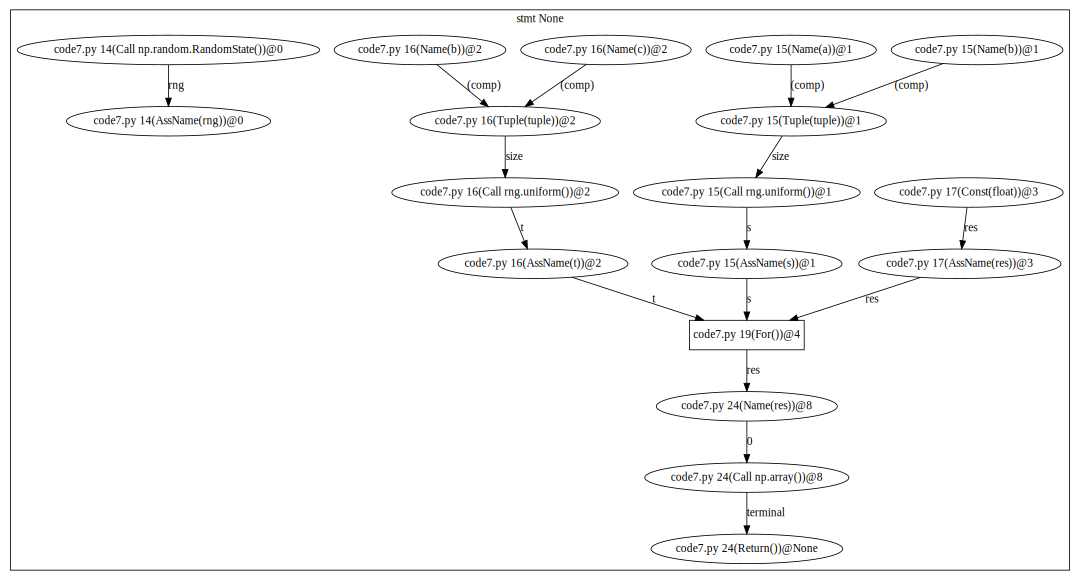

In [6]:
heim.dfg.draw_digraph(size="15")
#heim.dfg.find_node_by_string('For').child_dfg.draw_digraph(size="11")
#heim.dfg.find_node_by_string('For').child_dfg.find_node_by_string('For').child_dfg.find_node_by_string('For').child_dfg.draw_digraph(size="15")

In [18]:
heim.dfg.find_node_by_string('For').child_dfg

In [17]:
heim.dfg

In [271]:
heim.dfg.find_node_by_string('For()').stats.finish_t

1440846878.943805

In [15]:
%debug data_flow.analyze_flow(last_stmt_sequence, heim.dfg.loop_stats).draw_digraph(size="15")

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> s
> <string>(2)<module>()

ipdb> 
--Call--
> /home/richard/workspace/heimdall/data_flow.py(34)analyze_flow()
     33 
---> 34 def analyze_flow(stmt_sequence, loop_stats):
     35     """

ipdb> b 362
Breakpoint 1 at /home/richard/workspace/heimdall/data_flow.py:362
ipdb> cont
> /home/richard/workspace/heimdall/data_flow.py(362)analyze_loop()
    361 
1-> 362     loop_node = dfg.add_loop(start_line, loop_ast, child_dfg, call_context)
    363     child_dfg.node_in_parent = loop_node

ipdb> print child_dfg
ipdb> exit


In [272]:
(fn, cr) = cythonify.loop_to_cython(heim.dfg, heim.dfg.find_node_by_string('For()'))

created cython file  /tmp/tmpUgAD2v.pyx


In [245]:
import pyximport.pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x7f8733daaf90>)

In [275]:
cr.c_file

u'/tmp/tmpUgAD2v.c'

In [251]:
abc = pyximport.pyximport.load_module('abc', '/tmp/tmpiYf69E.pyx')

In [262]:
heim.watcher.loopstats[4].finish_t - heim.watcher.loopstats[4].start_t

2.7196178436279297

In [285]:
opt = optimizer.Optimizer()

In [288]:
opt.optimize_loops(('/home/richard/workspace/heimdall/tests/code7.py', 'f1'), heim.dfg)

optimize_loops called with ('/home/richard/workspace/heimdall/tests/code7.py', 'f1') <data_flow.DataFlowGraph object at 0x7f87336d33d0>


IndexError: list index out of range

In [290]:
myloopfn

<function crazyloopingmodule.newfunc>

In [7]:
a,b,c = 140, 2500, 290
rng = np.random.RandomState(55)
s = rng.uniform(size=(a, b))
t = rng.uniform(size=(b, c))

In [8]:
%%timeit
res = 0
(res, ) = myloopfn(s, t, res, a, c)

1 loops, best of 3: 903 ms per loop


In [299]:
res

25384022.28676663

In [9]:
%%timeit
res = 0
for i in range(a):
    for j in range(c):
        res = (res) + (np.dot(s[i], t[:,j]))

1 loops, best of 3: 942 ms per loop


In [301]:
res

25384022.28676663

In [309]:
import crazyloopingmodule

In [313]:
crazyloopingmodule.newfunc()

TypeError: newfunc() takes exactly 5 positional arguments (0 given)